This project will examine the 25 highest rated players on Fifa 19. At first, we will attempt to look at which attributes make these players some of the best in their positions. This can potentially be done by grouping players that play in similar positions, and then seeing which attributes they are strong at.

The first step will be to read the data from the csv file obtained from kaggle.com/datasets, and trim it down to only the top 25 players that we are interested in for this project.

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('data.csv')
top25_data = data.head(25)
top25_data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


Here we plot each player with thier Overall rating in Fifa 19. Additionally, we find the mean Overall rating for the top 25 players. This gives us a rough idea of the range we are working with.

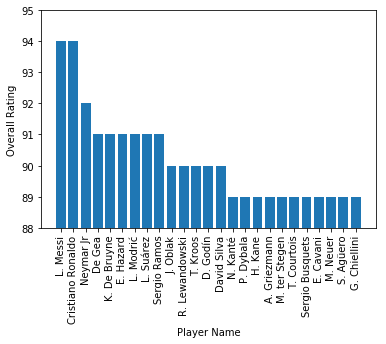

the mean Overall rating is 90.2
the median Overall rating is 90.0


In [7]:
plt.xlabel('Player Name')
plt.ylabel('Overall Rating')
bar = plt.bar(top25_data['Name'], top25_data['Overall'])
plt.xticks(rotation='vertical')
plt.ylim(88, 95)
plt.show()

mean_overall = np.mean(top25_data['Overall'])
median_overall = np.median(top25_data['Overall'])
print('the mean Overall rating is', mean_overall)
print('the median Overall rating is', median_overall)

The mean Overall rating was found to be 90.2 and the median is 90. If we look at the graph or the data, we can see that the highest rating (Messi and Ronaldo) is 94 whilst the lowest is 89. The first thing to point out, is that both the mean and median values are far closer to the lowest value than the highest. This is simply because the majority of our players have Overall ratings of 89, 90 or 91. We then have Neymar on 92, no one on 93 and finally Messi and Ronaldo on 94.

Next up, we will attempt to sort our players based on positions. We will try to keep similar positions grouped together (such as Right Wing, Left Wing, Right Forward and Left Forward). Perhaps in the future we will look at players who can play multiple positions, but for now each player will only be in a single group.

In [9]:
gk = top25_data[top25_data.Position == 'GK']
cb = top25_data[(top25_data.Position == 'CB') | (top25_data.Position == 'LCB') | (top25_data.Position == 'RCB')]
fb = top25_data[(top25_data.Position == 'RB') | (top25_data.Position == 'LB')]
cm = top25_data[(top25_data.Position == 'CM') | (top25_data.Position == 'RCM') | (top25_data.Position == 'LCM') | (top25_data.Position == 'CDM') | (top25_data.Position == 'CAM') | (top25_data.Position == 'RDM') | (top25_data.Position == 'LDM')]
wf = top25_data[(top25_data.Position == 'RW') | (top25_data.Position == 'LW') | (top25_data.Position == 'RF') | (top25_data.Position == 'LF')]
st = top25_data[(top25_data.Position == 'ST') | (top25_data.Position == 'RS') | (top25_data.Position == 'LS')]

len(gk) + len(cb) + len(fb) + len(cm) + len(wf) + len(st)

25

The data is now seperated into groups. We can add the lengths of each set to ensure that we haven't missed any players out, as there should be 25 players in total.